# 4. Linear Models for Classification

In [1]:
import sys
sys.path.append("../")
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from numpy.linalg import inv, pinv

from prmlmy.util import cv_, norm2s, calc_range
from prmlmy.plot_util import plot_decision_boundary, grid_plot

seed = 12

In [2]:
from importlib import reload
import prmlmy.preprocess; reload(prmlmy.preprocess)
import prmlmy.linear; reload(prmlmy.linear);
from prmlmy.linear import LinearDiscriminantAnalysis

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prmlmy.pipe import SimplePipe
from prmlmy.preprocess import PolynomialFeature
from prmlmy.linear import (
    LinearDiscriminantAnalysis, 
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
#     Perceptron,
#     SoftmaxRegression
)


In [4]:
def create_toy_data(size=50, add_outliers=False, add_class=False, seed=seed):
    np.random.seed(seed)
    x0 = np.random.normal(size=size).reshape(-1, 2) - 1
    x1 = np.random.normal(size=size).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=size).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(size//2), np.ones(size//2)]).astype(np.int)

In [86]:
def fit_and_plot_decision_boundary(model, data_name, title, ax=None):
    X_train, y_train = data_map[data_name]
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_train, y_train, ax=ax, title=title)

In [96]:
def fit_and_plot_decision_proba(model, data_name, title, ax=None):
    X_train, y_train = data_map[data_name]
    model.fit(X_train, y_train)
    plot_decision_proba(model, X_train, y_train, ax=ax, title=title)

In [6]:
data_map = {
    "base": create_toy_data(), 
    "outliers": create_toy_data(add_outliers=True), 
    "3 class": create_toy_data(add_class=True), 
    "big": create_toy_data(size=1000), 
}

## 4.1 Discriminant Functions

### 4.1.3 Least squares for classification

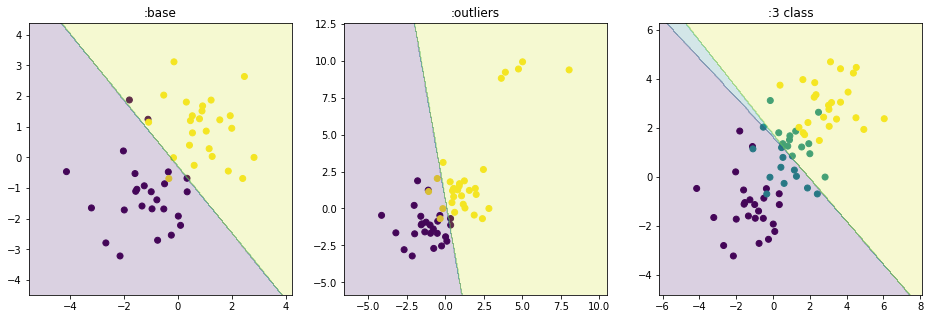

In [7]:
data_names = ["base", "outliers", "3 class"]
model = SimplePipe([
    PolynomialFeature(1), 
    LeastSquaresClassifier(), 
])
grid_plot([model], data_names, fit_and_plot_decision_boundary, row_names=[""])

### 4.1.4 Fisher's linear discriminant

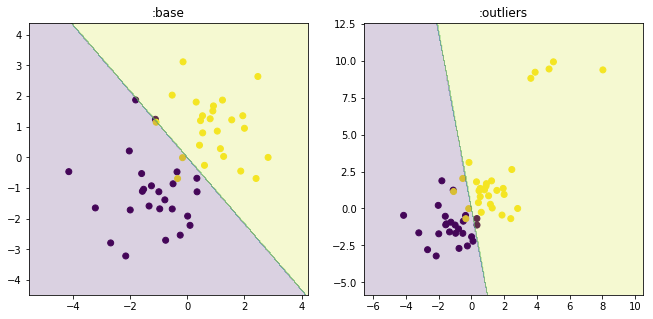

In [9]:
data_names = ["base", "outliers"]
models = [FishersLinearDiscriminant()]
grid_plot(models, data_names, fit_and_plot_decision_boundary, row_names=[""])

## 4.3 Probabilistic Discriminative Models

### Linear Discriminant Analysis

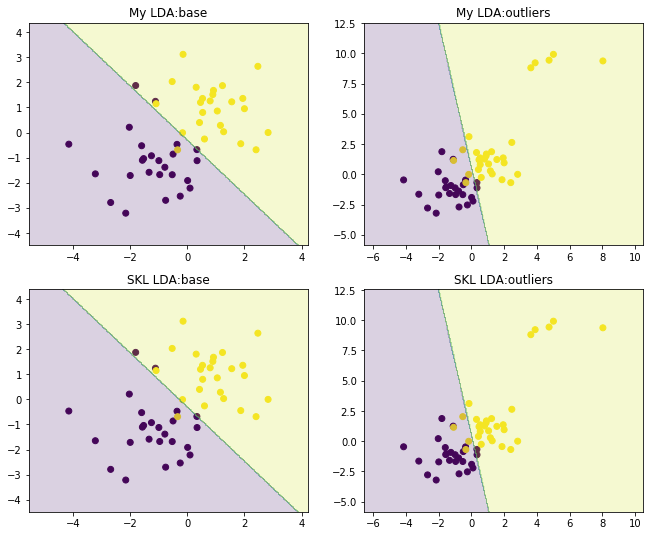

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDASklearn
models = [LinearDiscriminantAnalysis(), LDASklearn()]
model_names = ["My LDA", "SKL LDA"]
data_names = ["base", "outliers"]
grid_plot(models, data_names, fit_and_plot_decision_boundary, row_names=model_names)

generative model 이니 데이터를 샘플링해보자

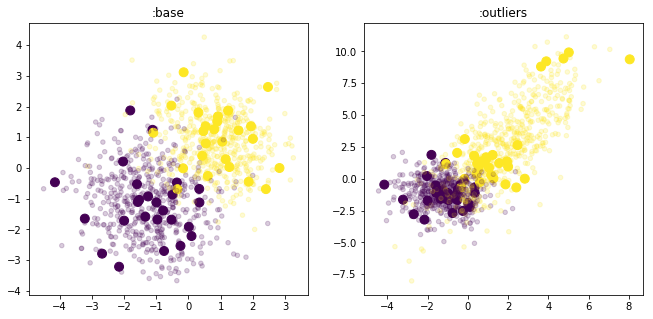

In [11]:
model = LinearDiscriminantAnalysis()
def plot_gen(model, data_name, title, ax):
    X_train, y_train = data_map[data_name]
    model.fit(X_train, y_train)
    xs, ys = model.generate(1000)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', s=80)
    ax.scatter(xs[:, 0], xs[:, 1], c=ys, s=20, alpha=0.2)
    ax.set_title(title)
    
grid_plot([model], ["base", "outliers"], plot_gen, row_names=[''])

### Logistic Regression

In [12]:
from importlib import reload
import prmlmy.preprocess; reload(prmlmy.preprocess)
import prmlmy.linear; reload(prmlmy.linear);
import prmlmy.util; reload(prmlmy.util);
import prmlmy.tfmodels; reload(prmlmy.tfmodels)
from prmlmy.linear import LogisticRegression
from prmlmy.tfmodels import LogisticRegression as TFLR

/home/msjung/.virtualenvs/python37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


69 step converged. break, 2.990988721438077e-05, 5e-05
61 step converged. break, 2.9188560788819426e-05, 5.4772255750516614e-05
8 step converged. break, 0.041983948286022636
7 step converged. break, 0.03816635972013101


../prmlmy/util.py:48: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


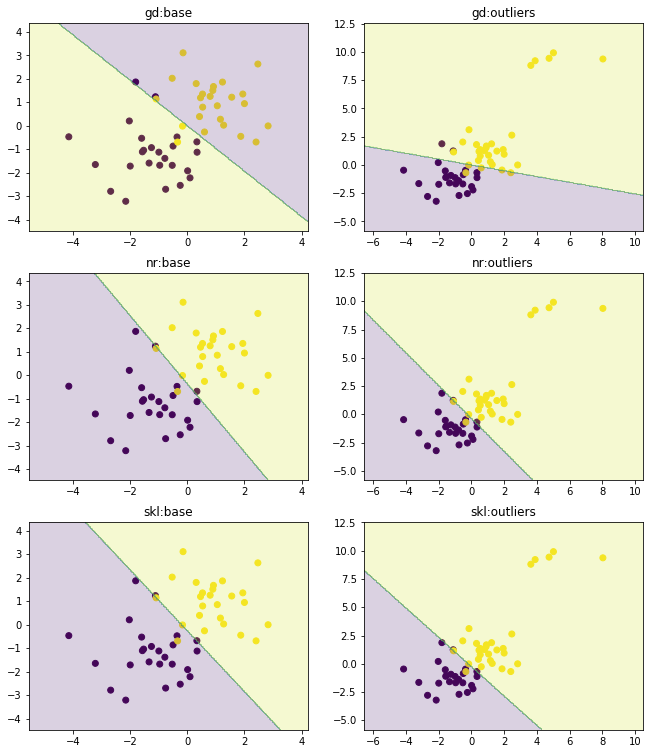

In [121]:
from sklearn.linear_model import LogisticRegression as SKLR
models = [
    LogisticRegression(solver="gd", eta=1e-3, max_iter=200), 
    LogisticRegression(solver="nr", max_iter=200), 
    SKLR(solver="lbfgs"), 
]
model_names = ["gd", "nr", "skl"]
data_names = ["base", "outliers"]
grid_plot(models, data_names, fit_and_plot_decision_boundary, row_names=model_names)

### tf쪽에서는 gradient 계산쪽이 의도대로 동작하지 않아서, 추후 tf를 더 살펴보고 구현하도록 보류

In [14]:
# X_train, y_train = data_map["base"]
# np.random.seed(123)
# model = TFLR(eta=.01, max_iter=100, fit_intercept=True)
# model.fit(X_train, y_train)
# plot_decision_boundary(model, X_train, y_train)
# plt.show()
# # print(model.score(X_train, y_train))

# history = np.concatenate(model.history, axis=0)
# plt.plot(history[:, 0], label='w1')
# plt.plot(history[:, 1], label='w2')
# plt.plot(history[:, 2], label='b')
# plt.legend()

### 4.3.4 Multiclass logistic regression

In [117]:
# x_train, y_train = create_toy_data(add_class=True)
# x1, x2 = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
# x = np.array([x1, x2]).reshape(2, -1).T

# feature = PolynomialFeature(1)
# X_train = feature.transform(x_train)
# X = feature.transform(x)

# model = SoftmaxRegression()
# model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
# y = model.classify(X)

# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
# plt.xlim(-5, 10)
# plt.ylim(-5, 10)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

### 4.5 Bayesian Logistic Regression

In [115]:
from importlib import reload
import prmlmy.preprocess; reload(prmlmy.preprocess)
import prmlmy.linear; reload(prmlmy.linear);
import prmlmy.plot_util; reload(prmlmy.plot_util);
from prmlmy.plot_util import plot_decision_proba
from prmlmy.linear import LogisticRegression, BayesianLogisticRegression

does not converge, 0.00027391715934172627, 5e-05
does not converge, 0.0002918383182586255, 5.4772255750516614e-05
does not converge, 0.00028983034736557856, 5e-05
does not converge, 0.0002716732664947788, 5.4772255750516614e-05


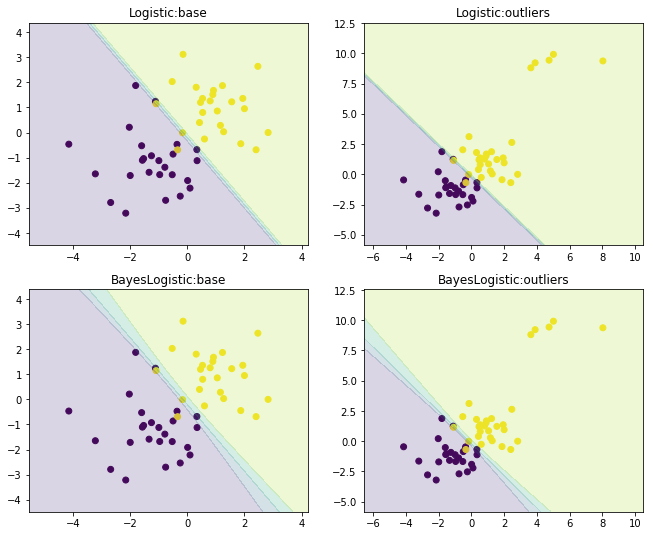

In [116]:
models = [
    LogisticRegression(solver="gd", eta=1e-3, alpha=0.001, max_iter=2000, atol=1e-3), 
    BayesianLogisticRegression(eta=1e-3, alpha=0.001, max_iter=2000), 
]
model_names = ["Logistic", "BayesLogistic"]
grid_plot(models, ["base", "outliers"], fit_and_plot_decision_proba, row_names=model_names)